In [1]:
# We import the libraries needed to read the dataset
import os
import pandas as pd
import numpy as np

In [2]:
# We placed the dataset under datasets/ sub folder
DATASET_PATH = 'datasets/'

In [3]:
# We read the data from the CSV file
data_path = os.path.join(DATASET_PATH, 'pima-indians-diabetes.csv')
dataset = pd.read_csv(data_path, header=None)

# Because thr CSV doesn't contain any header, we add column names 
# using the description from the original dataset website
dataset.columns = [
    "NumTimesPrg", "PlGlcConc", "BloodP",
    "SkinThick", "TwoHourSerIns", "BMI",
    "DiPedFunc", "Age", "HasDiabetes"]

In [4]:
# Check the shape of the data: we have 768 rows and 9 columns:
# the first 8 columns are features while the last one
# is the supervised label (1 = has diabetes, 0 = no diabetes)
dataset.shape

(768, 9)

In [7]:
# Visualise a table with the first rows of the dataset, to
# better understand the data format
dataset.head()

NumTimesPrg  PlGlcConc  BloodP  SkinThick  TwoHourSerIns   BMI  DiPedFunc  \
0            6        148      72         35              0  33.6      0.627   
1            1         85      66         29              0  26.6      0.351   
2            8        183      64          0              0  23.3      0.672   
3            1         89      66         23             94  28.1      0.167   
4            0        137      40         35            168  43.1      2.288   

   Age  HasDiabetes  
0   50            1  
1   31            0  
2   32            1  
3   21            0  
4   33            1

In [8]:
corr = dataset.corr()
corr

NumTimesPrg  PlGlcConc    BloodP  SkinThick  TwoHourSerIns  \
NumTimesPrg       1.000000   0.129459  0.141282  -0.081672      -0.073535   
PlGlcConc         0.129459   1.000000  0.152590   0.057328       0.331357   
BloodP            0.141282   0.152590  1.000000   0.207371       0.088933   
SkinThick        -0.081672   0.057328  0.207371   1.000000       0.436783   
TwoHourSerIns    -0.073535   0.331357  0.088933   0.436783       1.000000   
BMI               0.017683   0.221071  0.281805   0.392573       0.197859   
DiPedFunc        -0.033523   0.137337  0.041265   0.183928       0.185071   
Age               0.544341   0.263514  0.239528  -0.113970      -0.042163   
HasDiabetes       0.221898   0.466581  0.065068   0.074752       0.130548   

                    BMI  DiPedFunc       Age  HasDiabetes  
NumTimesPrg    0.017683  -0.033523  0.544341     0.221898  
PlGlcConc      0.221071   0.137337  0.263514     0.466581  
BloodP         0.281805   0.041265  0.239528     0.065068  
SkinThick      0.392573   0.183928 -0.113970     0.074752  
TwoHourSerIns  0.197859   0.185071 -0.042163     0.130548  
BMI            1.000000   0.140647  0.036242     0.292695  
DiPedFunc      0.140647   1.000000  0.033561     0.173844  
Age            0.036242   0.033561  1.000000     0.238356  
HasDiabetes    0.292695   0.173844  0.238356     1.000000

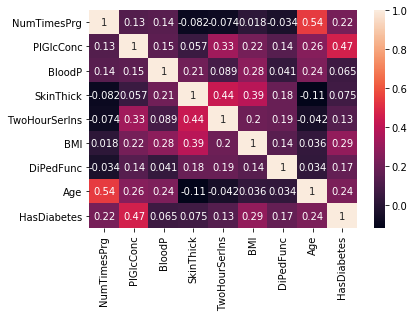

In [9]:
%matplotlib inline
import seaborn as sns
sns.heatmap(corr, annot = True)

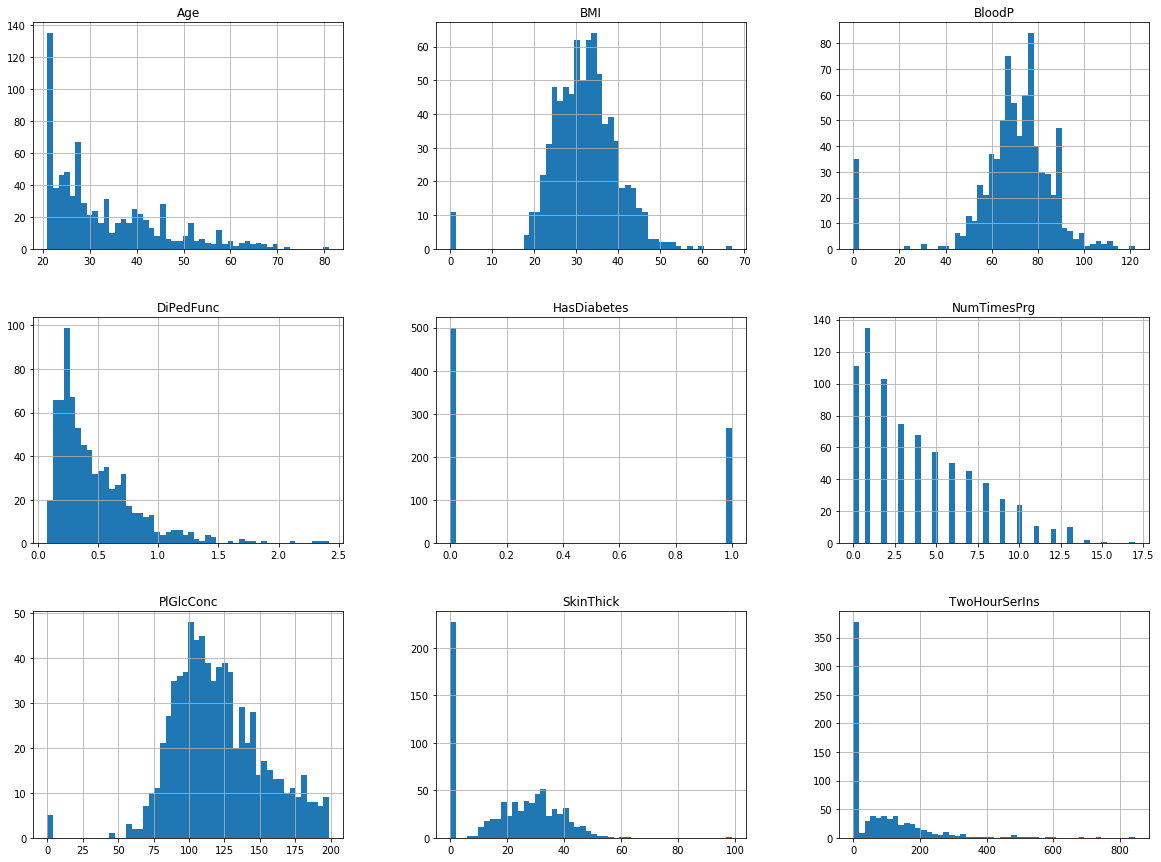

In [10]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [11]:
# Calculate the median value for BMI
median_bmi = dataset['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
dataset['BMI'] = dataset['BMI'].replace(
    to_replace=0, value=median_bmi)

In [12]:
# Calculate the median value for BloodP
median_bloodp = dataset['BloodP'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
dataset['BloodP'] = dataset['BloodP'].replace(
    to_replace=0, value=median_bloodp)

In [13]:
# Calculate the median value for PlGlcConc
median_plglcconc = dataset['PlGlcConc'].median()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
dataset['PlGlcConc'] = dataset['PlGlcConc'].replace(
    to_replace=0, value=median_plglcconc)

In [14]:
# Calculate the median value for SkinThick
median_skinthick = dataset['SkinThick'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
dataset['SkinThick'] = dataset['SkinThick'].replace(
    to_replace=0, value=median_skinthick)

In [15]:
# Calculate the median value for TwoHourSerIns
median_twohourserins = dataset['TwoHourSerIns'].median()
# Substitute it in the TwoHourSerIns column of the
# dataset where values are 0
dataset['TwoHourSerIns'] = dataset['TwoHourSerIns'].replace(
    to_replace=0, value=median_twohourserins)

In [16]:
# Split the training dataset in 80% / 20%
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    dataset, test_size=0.2, random_state=42)

In [17]:
# Separate labels from the rest of the dataset
train_set_labels = train_set["HasDiabetes"].copy()
train_set = train_set.drop("HasDiabetes", axis=1)

test_set_labels = test_set["HasDiabetes"].copy()
test_set = test_set.drop("HasDiabetes", axis=1)

In [18]:
# Apply a scaler
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

In [19]:
df = pd.DataFrame(data=train_set_scaled)
df.head()

0         1         2         3         4         5         6  \
0  0.117647  0.258065  0.489796  0.272727  0.019832  0.282209  0.096499   
1  0.529412  0.438710  0.591837  0.290909  0.019832  0.204499  0.514091   
2  0.058824  0.612903  0.224490  0.200000  0.082933  0.214724  0.245944   
3  0.000000  0.754839  0.265306  0.272727  0.019832  0.075665  0.075149   
4  0.352941  0.580645  0.571429  0.527273  0.427885  0.572597  0.068318   

          7  
0  0.000000  
1  0.483333  
2  0.016667  
3  0.733333  
4  0.416667

In [20]:
# Import all the algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [21]:
# Import the slearn utility to compare algorithms
from sklearn import model_selection

In [22]:
# Prepare an array with all the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

In [23]:
# Prepare the configuration to run the test
seed = 7
results = []
names = []
X = train_set_scaled
Y = train_set_labels

In [24]:
# Every algorithm is tested and results are
# collected and printed
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

/home/juancastro/anaconda2019/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/juancastro/anaconda2019/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/juancastro/anaconda2019/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/juancastro/anaconda2019/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/juancastro/anaconda2019/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

LR: 0.755632 (0.045675)
KNN: 0.740984 (0.049627)
NB: 0.739450 (0.062140)
SVC: 0.757271 (0.037642)
LSVC: 0.763802 (0.042701)
RFC: 0.729482 (0.053769)
DTR: 0.713247 (0.049673)


/home/juancastro/anaconda2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juancastro/anaconda2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juancastro/anaconda2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juancastro/anaconda2019/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juancastro

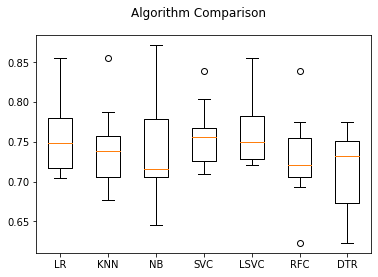

In [25]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1.0, 10.0, 50.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

model_svc = SVC()

grid_search = GridSearchCV(
    model_svc, param_grid, cv=10, scoring='accuracy')
grid_search.fit(train_set_scaled, train_set_labels)

/home/juancastro/anaconda2019/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0], 'coef0': [0.0, 0.1, 0.5],
                         'gamma': ['auto', 1, 0.1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [27]:
# Print the bext score found
grid_search.best_score_

0.7687296416938111

In [28]:
# Create an instance of the algorithm using parameters
# from best_estimator_ property
svc = grid_search.best_estimator_

# Use the whole dataset to train the model
X = np.append(train_set_scaled, test_set_scaled, axis=0)
Y = np.append(train_set_labels, test_set_labels, axis=0)

# Train the model
svc.fit(X, Y)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
# We create a new (fake) person having the three most correated values high
new_df = pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 0.627, 65]])
# We scale those values like the others
new_df_scaled = scaler.transform(new_df)

In [30]:
# We predict the outcome
prediction = svc.predict(new_df_scaled)

In [31]:
# A value of "1" means that this person is likley to have type 2 diabetes
prediction

array([1])

In [32]:
import joblib

In [34]:
# save the model to disk
filename = 'models/diabetes.model'
joblib.dump(svc, filename)

['models/diabetes.model']

In [35]:
# save the scaler to disk
filename = 'models/scaler.scaler'
joblib.dump(scaler, filename)

['models/scaler.scaler']